# Data preparation

This notebook shows the data preparation part of the assignment.

In [1]:
import pandas as pd

### Load data

Initial peek at data shows that
- The data set contains zero null-values. 
- All values have dtype `int64`.
- The data ranges from 0-2 (`KidHome`) to 0-1727 (`MntFishMeatProdcts`)

In [2]:
# Load the heart dataset
data = pd.read_csv("customer_data_large.csv")

# Check the dimensions of the dataset
dimensions = data.shape

print(f'The dataset has {dimensions[0]} rows and {dimensions[1]} colums.')

data.info()
data.describe()

The dataset has 2230 rows and 14 colums.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Education           2230 non-null   int64
 1   Kidhome             2230 non-null   int64
 2   Recency             2230 non-null   int64
 3   MntWines            2230 non-null   int64
 4   MntFruits           2230 non-null   int64
 5   MntSweetProducts    2230 non-null   int64
 6   MntGoldProds        2230 non-null   int64
 7   NumWebPurchases     2230 non-null   int64
 8   NumStorePurchases   2230 non-null   int64
 9   NumWebVisitsMonth   2230 non-null   int64
 10  Age                 2230 non-null   int64
 11  Years_customer      2230 non-null   int64
 12  Num_AcceptedCmp     2230 non-null   int64
 13  MntFishMeatProdcts  2230 non-null   int64
dtypes: int64(14)
memory usage: 244.0 KB


,Education,Kidhome,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Num_AcceptedCmp,MntFishMeatProdcts
count,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.00000
mean,3.458744,0.444395,49.167713,304.093722,26.269058,27.114350,43.849776,4.847534,5.795964,7.106726,50.940359,8.972197,0.445740,204.52287
std,1.003293,0.538598,28.955724,336.930422,39.721905,41.335228,51.895444,3.067080,3.254714,4.069197,10.877867,0.683811,0.889835,260.66920
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,8.000000,0.000000,1.00000
25%,3.000000,0.000000,24.000000,24.000000,1.000000,1.000000,9.000000,3.000000,3.000000,4.000000,43.000000,9.000000,0.000000,21.00000
50%,3.000000,0.000000,50.000000,173.000000,8.000000,8.000000,24.000000,4.000000,5.000000,7.000000,49.000000,9.000000,0.000000,80.00000
75%,4.000000,1.000000,74.000000,504.750000,33.000000,33.000000,56.000000,7.000000,8.000000,8.000000,59.000000,9.000000,1.000000,306.75000
max,5.000000,2.000000,99.000000,1493.000000,199.000000,263.000000,362.000000,32.000000,13.000000,20.000000,81.000000,10.000000,5.000000,1727.00000


### Outliers

To analyze outliers, we start by taking a look at box plots of features with potential outliers and by identifying the number of instances falling out of range. These include the 'amount'-features, and the 'purchases'- and 'visits'-features.

We use the IQR method to calculate possible outliers.

In [3]:
def IQR_bounds(dataframe, column, lower_quantile=0.25, upper_quantile=0.75, should_print=True):
    Q1, Q3 = dataframe[column].quantile([lower_quantile, upper_quantile])

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    low_outliers = (dataframe[column] < lower_bound).sum()
    high_outliers = (dataframe[column] > upper_bound).sum()

    if should_print:
        print(f'{column} has {low_outliers} low outliers (below {lower_bound}) and {high_outliers} high outliers (above {upper_bound})')

    return lower_bound, upper_bound

MntWines has 0 low outliers (below -697.125) and 35 high outliers (above 1225.875)


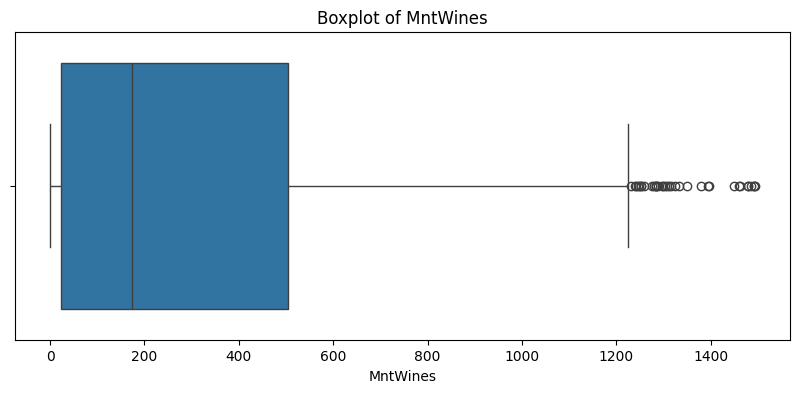

MntFruits has 0 low outliers (below -47.0) and 225 high outliers (above 81.0)


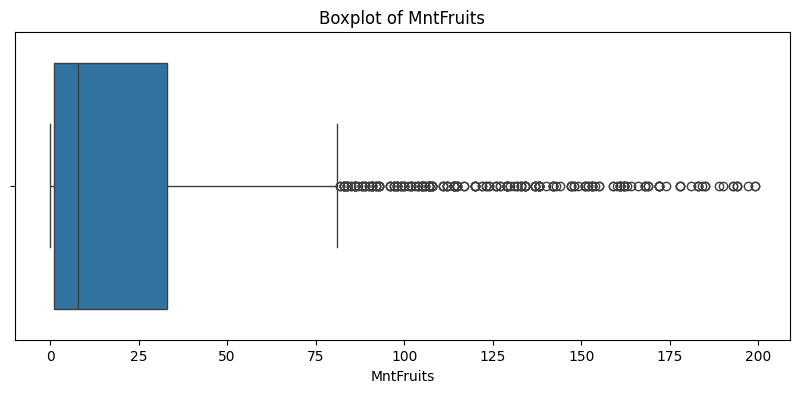

MntSweetProducts has 0 low outliers (below -47.0) and 248 high outliers (above 81.0)


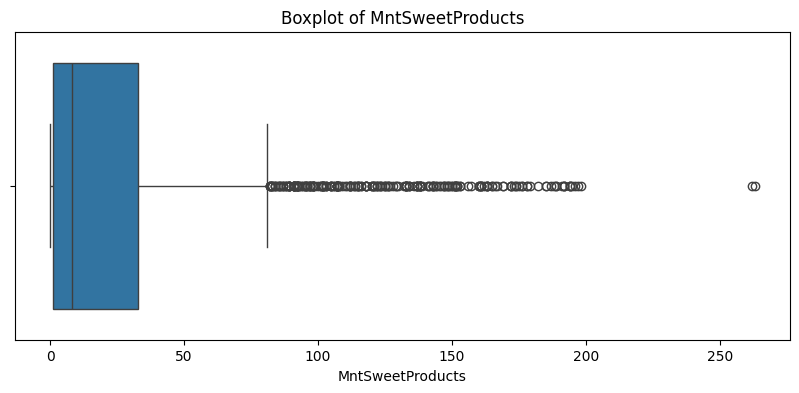

MntGoldProds has 0 low outliers (below -61.5) and 204 high outliers (above 126.5)


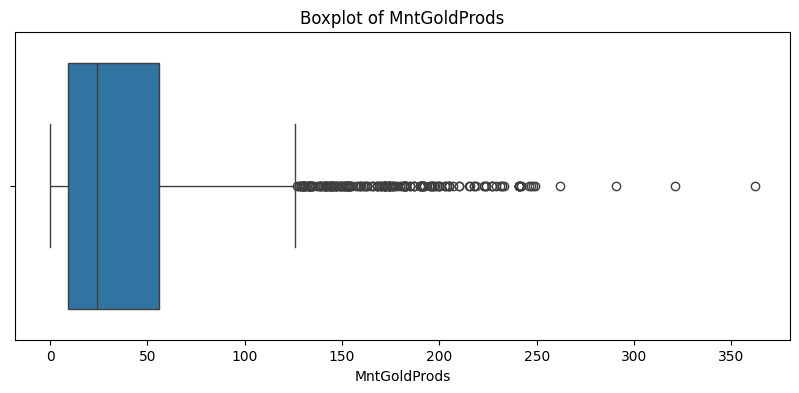

NumWebPurchases has 0 low outliers (below -3.0) and 11 high outliers (above 13.0)


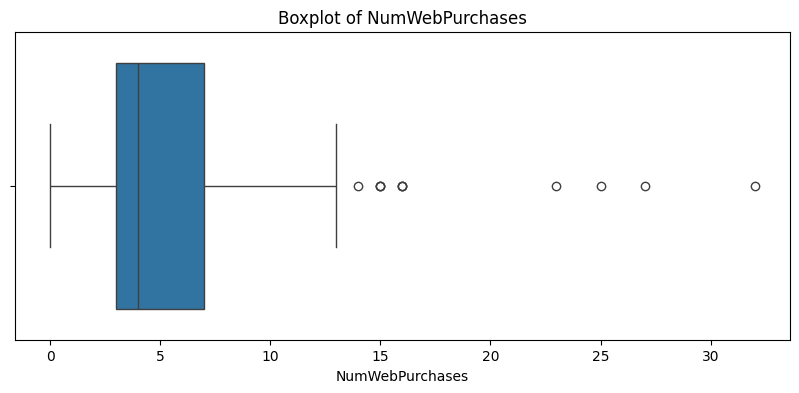

NumStorePurchases has 0 low outliers (below -4.5) and 0 high outliers (above 15.5)


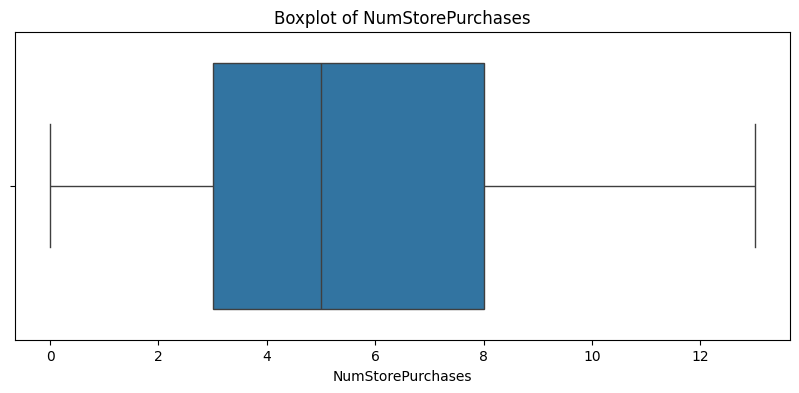

NumWebVisitsMonth has 0 low outliers (below -2.0) and 148 high outliers (above 14.0)


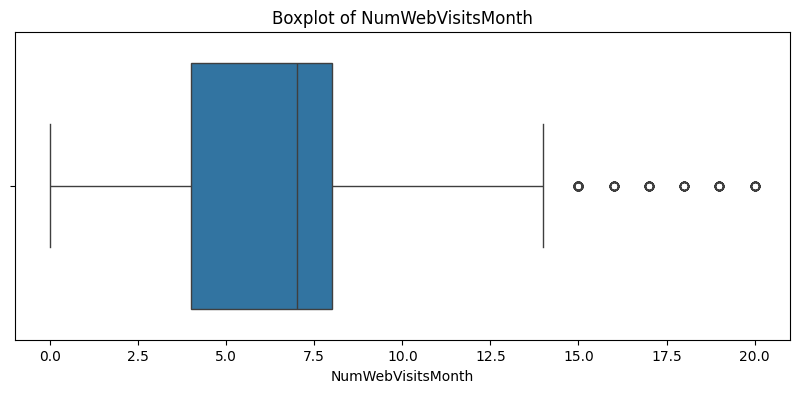

MntFishMeatProdcts has 0 low outliers (below -407.625) and 138 high outliers (above 735.375)


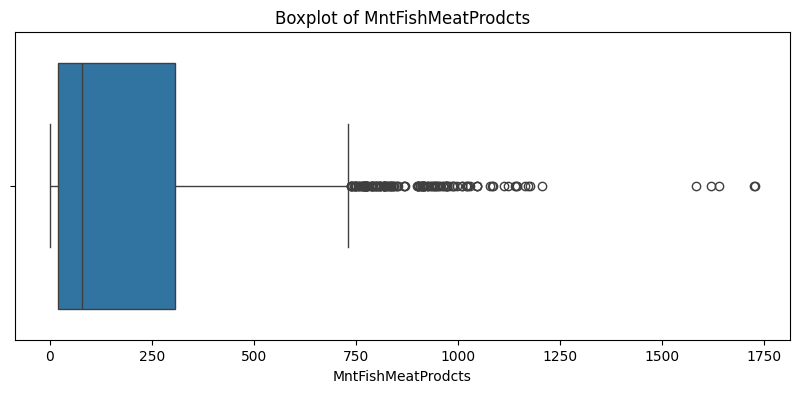

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

possible_outlier_columns = ['MntWines', 'MntFruits',
       'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'MntFishMeatProdcts']

for feature in possible_outlier_columns:
    IQR_bounds(data, feature, 0.25, 0.75)
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

From the above visualizations we see that none of the features have any low outliers. We also see that
- `MntWines`: Have 35 potential outliers. These may be important in a business perspective, as they can be a part of a customer segment (e.g. high-expenditure customers). As the majority of the instances are significantly lower than these high outliers, they may however skew standardization and make  the clustering poorer. We will try to both remove and keep them, and see what makes the clustering better.  

- `MntFruits`: All possible outliers are evenly spread from Q3 to max. The max is however more than twice the Q3 limit, and including them will significanly skew the standardization. We will try to both include all, and to remove all instances above 2\*Q3. By removing the instances above 2\*Q3, we will still keep some of these potentially important values and not skew the standardization too much.

-  `MntSweetProducts`: The majority of possible outliers increase gradually from Q3, whereas two customers have spent significantly more (more than 25%). The gradual increase from Q3 suggests that these may be an important customer segment, whereas the two lone outliers will be removed. 

- `MntGoldProds`: As with `MntSweetProducts`, the outliers increase gradually and intensively from Q3 to 250 while four are significantly higher. These four will be removed. 

- `NumWebPurchases`: Only 11 outliers. Most of them are close to the Q3, whereas four are significantly higher. We will try to both remove all (as there are few outliers) and to only remove the highest four. 

- `NumStorePurchases`: No outliers. 

- `NumWebVisitsMonth`: 148 potential high outliers. The values do however not vary greatly, and these high web visits may be of importance. due to the possible importance and the significant amount, they will all be kept. 

- `MntFishMeatProducts`: The majority of possible outliers increase gradually from Q3, whereas a few customers have spent significantly more. The significant amount of outliers close to Q3, and their potential value, forces ut to keep them, while the highest outliers will be removed. 

In [5]:
def remove_outliers(df):
    _, bound_fruit = IQR_bounds(df, 'MntFruits', should_print=False)
    _, bound_web = IQR_bounds(df, 'NumWebPurchases', should_print=False)

    outliers_wine = df[(df['MntWines'] > 1400)].index
    print(f'Removing {len(outliers_wine)} wine outliers')
    df = df.drop(outliers_wine)
    
    outliers_fruit = df[(df['MntFruits'] > bound_fruit * 2)].index
    print(f'Removing {len(outliers_fruit)} fruit outliers')
    df = df.drop(outliers_fruit)
    
    outliers_sweets = df[(df['MntSweetProducts'] > 200)].index
    print(f'Removing {len(outliers_sweets)} sweets outliers')
    df = df.drop(outliers_sweets)

    outliers_gold = df[(df['MntGoldProds'] > 250)].index
    print(f'Removing {len(outliers_gold)} gold outliers')
    df = df.drop(outliers_gold)

    outliers_web_1 = df[(df['NumWebPurchases'] > bound_web)].index
    outliers_web_2 = df[(df['NumWebPurchases'] > 20)].index
    # print(f'Removing {len(outliers_web_1)} web purchase outliers')
    # df = df.drop(outliers_web_1)
    print(f'Removing {len(outliers_web_2)} web purchase outliers')
    df = df.drop(outliers_web_2)

    outliers_fish_meat = df[(df['MntFishMeatProdcts'] > 1250)].index
    print(f'Removing {len(outliers_fish_meat)} fish_meat outliers')
    df = df.drop(outliers_fish_meat)

    return df


In [6]:
data = remove_outliers(data)

Removing 9 wine outliers
Removing 34 fruit outliers
Removing 2 sweets outliers
Removing 3 gold outliers
Removing 0 web purchase outliers
Removing 5 fish_meat outliers


### Scale data 

Distance-based algorithms, that encompass K-means, PCA and t-SNE, are vulnerable to bias from unscaled data. To address this, we use `sklearn.preprocessing.MinMaxScaler`

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data)